In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
full = pd.read_csv('a/faktor/full.csv')
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25196 entries, 0 to 25195
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        25196 non-null  object 
 1   code_presentation  25196 non-null  object 
 2   id_student         25196 non-null  int64  
 3   gender             25196 non-null  object 
 4   region             25196 non-null  object 
 5   highest_education  25196 non-null  object 
 6   imd_band           25196 non-null  object 
 7   age_band           25196 non-null  object 
 8   disability         25196 non-null  object 
 9   attempts           25196 non-null  bool   
 10  studied_credits    25196 non-null  int64  
 11  month              25196 non-null  float64
 12  mean_date          25196 non-null  float64
 13  forumng            25196 non-null  int64  
 14  mean_materi        25196 non-null  float64
 15  activity_type      25196 non-null  int64  
 16  weighted_grade     251

In [3]:
full.groupby('code_module').size()

code_module
AAA     700
BBB    5946
CCC    3129
DDD    4800
EEE    2281
FFF    6242
GGG    2098
dtype: int64

In [4]:
# Unique values for each of the non-numeric features:

for col in full.loc[:, "gender":].columns:
    if full[col].dtype == 'object':
        print(f"{col} has {len(full[col].unique())} unique values:")
        display(pd.DataFrame(full[col].value_counts(dropna=False)))

gender has 2 unique values:


,gender
M,13812
F,11384


region has 13 unique values:


,region
Scotland,2786
East Anglian Region,2596
South Region,2469
London Region,2354
North Western Region,2114
South West Region,1909
West Midlands Region,1901
East Midlands Region,1784
Wales,1691
South East Region,1655


highest_education has 5 unique values:


,highest_education
A Level or Equivalent,11258
Lower Than A Level,9535
HE Qualification,3913
Post Graduate Qualification,276
No Formal quals,214


imd_band has 10 unique values:


,imd_band
20-30,3629
30-40,2722
10-20,2514
40-50,2494
50-60,2493
60-70,2341
0-10,2332
70-80,2328
80-90,2235
90-100,2108


age_band has 3 unique values:


,age_band
0-35,17484
35-55,7529
55<=,183


disability has 2 unique values:


,disability
N,22866
Y,2330


final_result has 4 unique values:


,final_result
Pass,12355
Fail,5549
Withdrawn,4268
Distinction,3024


<AxesSubplot:>

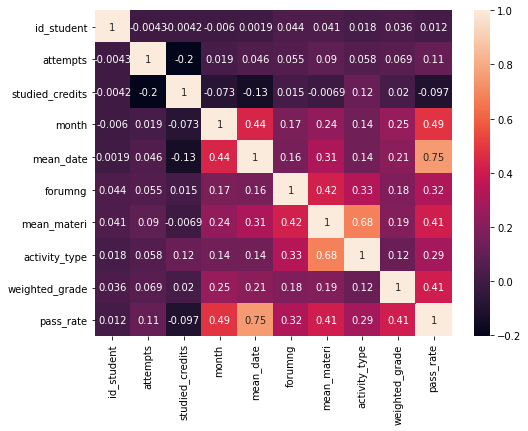

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(full.corr(),annot=True)

In [7]:
df = full.loc[:, "gender":]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25196 entries, 0 to 25195
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             25196 non-null  object 
 1   region             25196 non-null  object 
 2   highest_education  25196 non-null  object 
 3   imd_band           25196 non-null  object 
 4   age_band           25196 non-null  object 
 5   disability         25196 non-null  object 
 6   attempts           25196 non-null  bool   
 7   studied_credits    25196 non-null  int64  
 8   month              25196 non-null  float64
 9   mean_date          25196 non-null  float64
 10  forumng            25196 non-null  int64  
 11  mean_materi        25196 non-null  float64
 12  activity_type      25196 non-null  int64  
 13  weighted_grade     25196 non-null  float64
 14  pass_rate          25196 non-null  float64
 15  final_result       25196 non-null  object 
dtypes: bool(1), float64(5)

<AxesSubplot:>

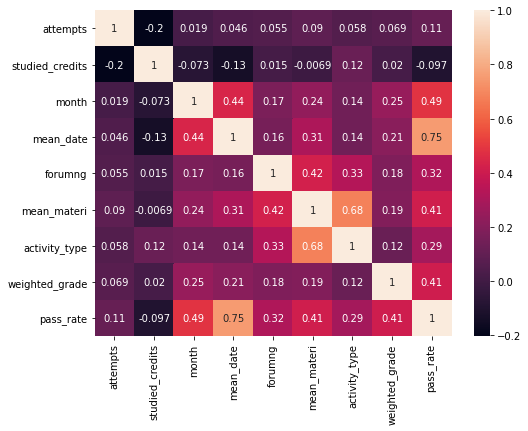

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='final_result', ylabel='count'>

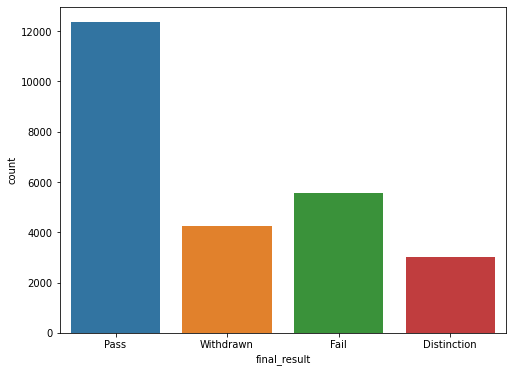

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="final_result")

In [22]:
#Labelling

from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def feature_encoder(df, features):
    label_encoder = preprocessing.LabelEncoder()
    for col in features:
        df[col] = label_encoder.fit_transform(df[col])
    return df

In [24]:
X=df.drop("final_result", axis=1)
y=df["final_result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
category_features = ["gender", "region", "highest_education","imd_band", "age_band", "disability","attempts"]
numerical_features = ["studied_credits", "month", "mean_date","forumng","mean_materi","activity_type","weighted_grade","pass_rate"]
target_label = "final_result"

encoded_features = feature_encoder(df, category_features)

results_classifier = lambda x: 1 if x == 'Pass' or x == 'Distinction' else 0
#binary result
encoded_features["final_result"] = encoded_features["final_result"].apply(results_classifier)

encoded_features

,gender,region,highest_education,imd_band,age_band,disability,attempts,studied_credits,month,mean_date,forumng,mean_materi,activity_type,weighted_grade,pass_rate,final_result
0,1,0,1,9,2,0,1,240,14.233333,111.739069,52,44.5,6,16.48,1.000000,1
1,0,6,1,2,1,0,1,60,10.700000,92.532356,163,57.5,7,13.08,1.000000,1
2,0,7,0,5,1,0,1,60,10.666667,99.678124,197,104.5,8,15.26,1.000000,1
3,0,11,2,5,0,0,1,60,14.800000,99.220225,77,69.0,7,11.00,0.600000,1
4,1,10,0,8,1,0,1,60,12.600000,127.902446,286,102.5,8,13.38,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25191,0,6,0,8,0,1,1,30,9.733333,135.081217,7,39.0,7,0.00,1.000000,1
25192,0,0,2,4,1,0,1,30,9.733333,145.923861,14,64.0,7,0.00,1.000000,1
25193,0,8,0,2,0,1,1,30,13.266667,116.294414,0,17.5,6,0.00,1.000000,1
25194,0,7,2,9,1,0,1,30,5.000000,27.614932,17,10.0,6,0.00,0.222222,0


In [20]:
# Converting the final table to catgorical data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [25]:
scaler=MinMaxScaler()
X1_train=scaler.fit_transform(X_train)
X1_test=scaler.transform(X_test)

,Feature,Score
0,pass_rate,0.420202
1,mean_date,0.315477
2,weighted_grade,0.245889
3,month,0.136865
4,mean_materi,0.116751
5,forumng,0.075341
6,activity_type,0.048620
7,attempts,0.010901
8,studied_credits,0.009230
9,region,0.007099


<AxesSubplot:>

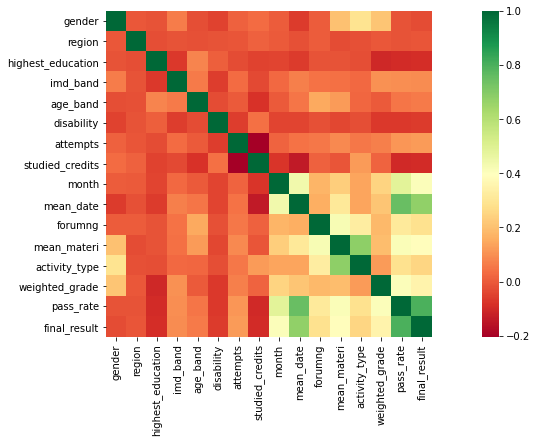

In [26]:
best_features = SelectKBest(score_func=mutual_info_classif, k=15)
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
feature_scores = pd.concat([df_columns, df_scores], axis="columns")
feature_scores.columns = ['Feature','Score']

# Comparing methods: SelectKBest and Heatmap Correlation Matrix
display(feature_scores.nlargest(18,'Score').reset_index(drop=True))
plt.figure(figsize=[18, 6])
sns.heatmap(encoded_features.loc[:,"gender":].corr(), square=True, cmap='RdYlGn')

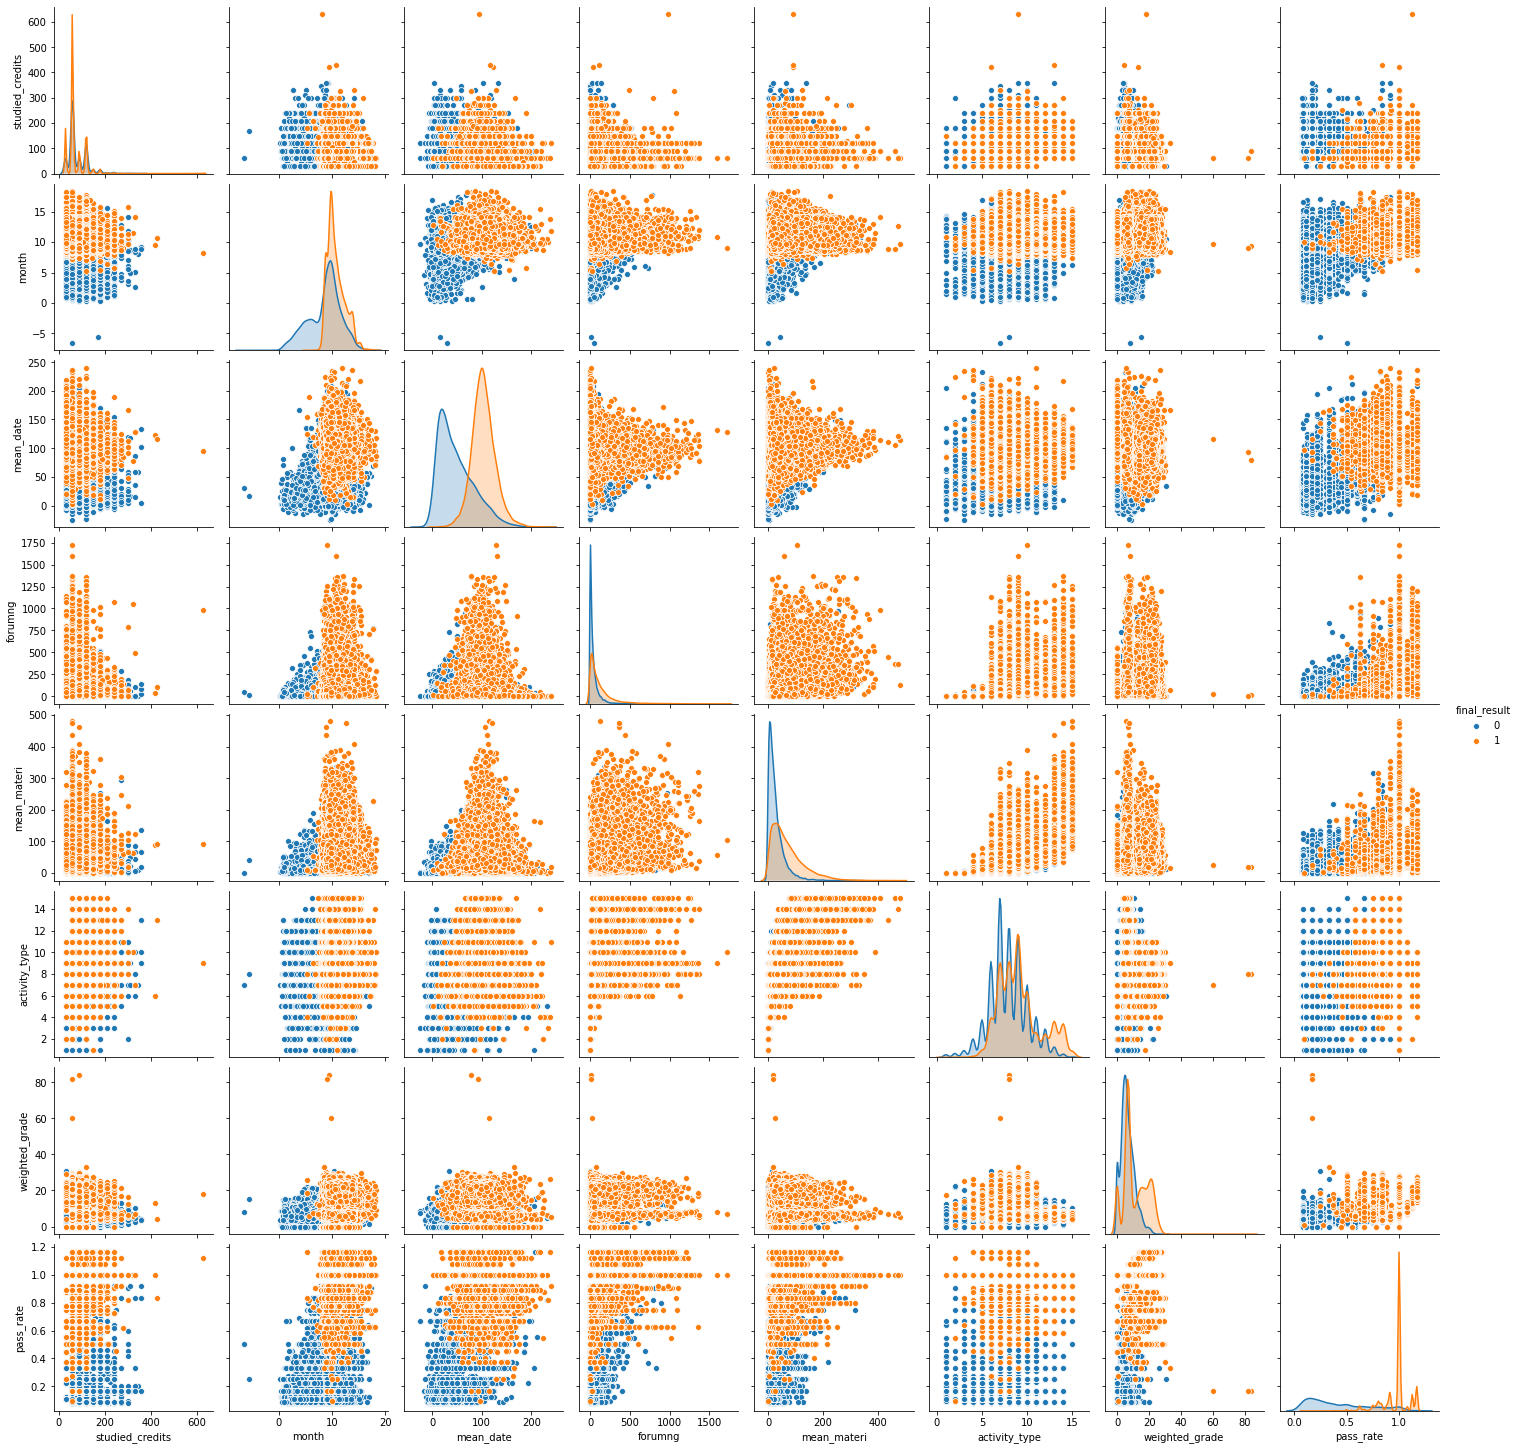

In [29]:
ax = sns.pairplot(encoded_features, hue="final_result", vars=numerical_features)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
lr1=LogisticRegression(max_iter=10000)
lr1.fit(X_train,y_train)
result_lr1=lr1.predict(X_test)
print(confusion_matrix(y_test,result_lr1))
print("\n")
print(classification_report(y_test,result_lr1))

[[2414  518]
 [ 142 4485]]


              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2932
           1       0.90      0.97      0.93      4627

    accuracy                           0.91      7559
   macro avg       0.92      0.90      0.91      7559
weighted avg       0.92      0.91      0.91      7559



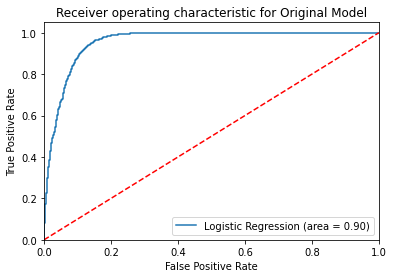

In [30]:
#try out the ROC curve of the first model (OurModel)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
OurModel = LogisticRegression(max_iter=10000)
OurModel.fit(X_train, y_train)


logit_roc_auc = roc_auc_score(y_test, OurModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, OurModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Original Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
lda1=LinearDiscriminantAnalysis()
lda1.fit_transform(X_train,y_train)
result_lda1=lda1.predict(X_test)
print(confusion_matrix(y_test,result_lda1))
print("\n")
print(classification_report(y_test,result_lda1))

[[2361  646]
 [  46 4506]]


              precision    recall  f1-score   support

           0       0.98      0.79      0.87      3007
           1       0.87      0.99      0.93      4552

    accuracy                           0.91      7559
   macro avg       0.93      0.89      0.90      7559
weighted avg       0.92      0.91      0.91      7559



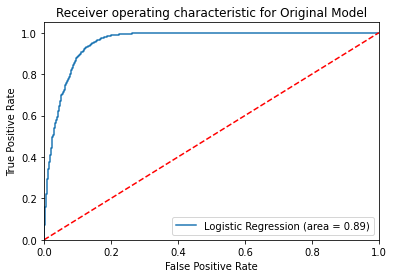

In [32]:
#try out the ROC curve of the first model (OurModel)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
OurModel = LinearDiscriminantAnalysis()
OurModel.fit(X_train, y_train)


logit_roc_auc = roc_auc_score(y_test, OurModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, OurModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Original Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [33]:
rf1=RandomForestClassifier(n_estimators=300)
rf1.fit(X_train,y_train)
result_rf1=rf1.predict(X_test)
print(confusion_matrix(y_test,result_rf1))
print("\n")
print(classification_report(y_test,result_rf1))

[[2533  474]
 [ 109 4443]]


              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3007
           1       0.90      0.98      0.94      4552

    accuracy                           0.92      7559
   macro avg       0.93      0.91      0.92      7559
weighted avg       0.93      0.92      0.92      7559



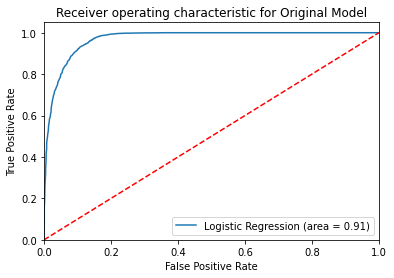

In [34]:
#try out the ROC curve of the first model (OurModel)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
OurModel = RandomForestClassifier(n_estimators=300)
OurModel.fit(X_train, y_train)


logit_roc_auc = roc_auc_score(y_test, OurModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, OurModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Original Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, accuracy_score

# Metrics summary for further evaluation
df_metrics = pd.DataFrame(
    index=["Accuracy", " Precision", "Recall"],
    columns=["Logistic Regression", "Decision Tree", "Nearest Neighbors", "Gradient Descent", "Support Vector Machine"]
)

def to_metrics(classifier, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    df_metrics.loc["Accuracy", classifier] = accuracy
    df_metrics.loc["Precision", classifier] = precision
    df_metrics.loc["Recall", classifier] = recall
    
    print("Accuracy score = %0.2f" %accuracy)
    
def calibrated_clf(classifier, calibrator, params, X, y):
    clf = classifier()
    cal_clf = calibrator(clf, params, cv=3)
    cal_clf.fit(X, y)
    print(f"Best parameters: {cal_clf.best_params_}")
    return cal_clf

# Defining features and target:
X = X.values
y = y.values

# Extracting data for training and testing:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

# Metrics
to_metrics("Decision Tree", y_test, y_pred)

# Confusion Matrix for Logistic Regression
cm_dt = confusion_matrix(y_test, y_pred)
df_cm_dt = pd.DataFrame(cm_dt, index=["True Fail", "True Pass"], columns=["Pred Fail", "Pred Pass"])
df_cm_dt

Accuracy score = 0.89


,Pred Fail,Pred Pass
True Fail,2489,417
True Pass,404,4249


In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Tunning Learning Parameters

knn_parameters = {"n_neighbors": [n for n in range(4, 11)],
                  "leaf_size": [n for n in range(20, 31)]}
calibrated_knn = calibrated_clf(KNeighborsClassifier, GridSearchCV, knn_parameters, X, y)
y_pred = calibrated_knn.predict(X_test)

# Metrics
to_metrics("Nearest Neighbors", y_test, y_pred)

# Confusion Matrix for Logistic Regression
cm_nn = confusion_matrix(y_test, y_pred)
df_cm_nn = pd.DataFrame(cm_nn, index=["Actual Fail", "Actual Pass"], columns=["Pred Fail", "Pred Pass"])
df_cm_nn

Best parameters: {'leaf_size': 20, 'n_neighbors': 9}
Accuracy score = 0.89


,Pred Fail,Pred Pass
Actual Fail,2338,568
Actual Pass,237,4416


The probability of getting a TP over a FP as per AUC is: 0.96


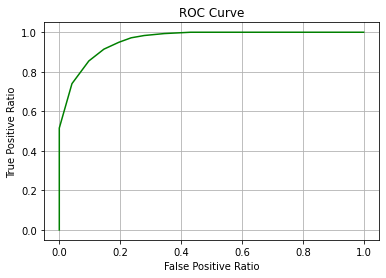

In [38]:
# print(knn_clf.predict_proba(X_test))

y_pred_prob = calibrated_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='green')
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("ROC Curve")
plt.grid()

print("The probability of getting a TP over a FP as per AUC is: %0.2f" % (roc_auc_score(y_test, y_pred_prob)))

In [39]:
from sklearn.linear_model import SGDClassifier

# Tunning Learning Parameters
gdc_parameters = {'alpha':[0.1, 0.3, 0.5],
                  'epsilon':[0.05, 0.1, 0.5]}
calibrated_gdc = calibrated_clf(SGDClassifier, GridSearchCV, gdc_parameters, X, y)
y_pred = calibrated_gdc.predict(X_test)

# Metrics
to_metrics("Gradient Descent", y_test, y_pred)

# Confusion Matrix for Logistic Regression
cm_gd = confusion_matrix(y_test, y_pred)
df_cm_gd = pd.DataFrame(cm_gd, index=["Actual Fail", "Actual Pass"], columns=["Pred Fail", "Pred Pass"])
df_cm_gd

Best parameters: {'alpha': 0.3, 'epsilon': 0.1}
Accuracy score = 0.86


,Pred Fail,Pred Pass
Actual Fail,1920,986
Actual Pass,84,4569


In [40]:
from sklearn.svm import SVC

# Tunning Learning Parameters
svc_parameters = {'C':[0.1, 1],}
calibrated_svc = calibrated_clf(SVC, GridSearchCV, svc_parameters, X, y)
y_pred = calibrated_svc.predict(X_test)

# Metrics
to_metrics("Support Vector Machine", y_test, y_pred)

# Confusion Matrix for Logistic Regression
cm_sv = confusion_matrix(y_test, y_pred)
df_cm_sv = pd.DataFrame(cm_sv, index=["Actual Fail", "Actual Pass"], columns=["Pred Fail", "Pred Pass"])
df_cm_sv

Best parameters: {'C': 1}
Accuracy score = 0.88


,Pred Fail,Pred Pass
Actual Fail,2166,740
Actual Pass,187,4466
